In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


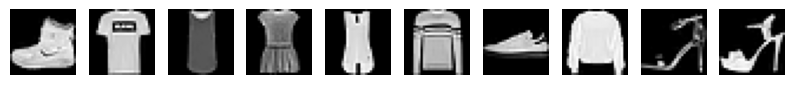

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')


In [ ]:
# Dataset information

for i in range(10):
  print(f"Number{i} : X_train shape is {X_train[i].shape} and it has the value of {y_train[i]}")
  print(f"This X_train has the minimum value of {X_train.min()} and maximum value of {X_train.max()}")
  print()

Number0 : X_train shape is (28, 28) and it has the value of 9
This X_train has the minimum value of 0 and maximum value of 255

Number1 : X_train shape is (28, 28) and it has the value of 0
This X_train has the minimum value of 0 and maximum value of 255

Number2 : X_train shape is (28, 28) and it has the value of 0
This X_train has the minimum value of 0 and maximum value of 255

Number3 : X_train shape is (28, 28) and it has the value of 3
This X_train has the minimum value of 0 and maximum value of 255

Number4 : X_train shape is (28, 28) and it has the value of 0
This X_train has the minimum value of 0 and maximum value of 255

Number5 : X_train shape is (28, 28) and it has the value of 2
This X_train has the minimum value of 0 and maximum value of 255

Number6 : X_train shape is (28, 28) and it has the value of 7
This X_train has the minimum value of 0 and maximum value of 255

Number7 : X_train shape is (28, 28) and it has the value of 2
This X_train has the minimum value of 0 an

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[0:10])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
X_train = X_train.astype('float32')/255.0
X_test  = X_test.astype('float32')/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print(f"New shape of X_train is {X_train.shape}")
print(f"New shape of X_test is {X_test.shape}")

New shape of X_train is (60000, 28, 28, 1)
New shape of X_test is (10000, 28, 28, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[0:10])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 8️⃣ Fit the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.7881 - loss: 0.6058 - val_accuracy: 0.8795 - val_loss: 0.3453
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8841 - loss: 0.3327 - val_accuracy: 0.8897 - val_loss: 0.3173
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9011 - loss: 0.2871 - val_accuracy: 0.8977 - val_loss: 0.2937
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9072 - loss: 0.2626 - val_accuracy: 0.8962 - val_loss: 0.2908
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9134 - loss: 0.2426 - val_accuracy: 0.9052 - val_loss: 0.2729
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9211 - loss: 0.2239 - val_accuracy: 0.8985 - val_loss: 0.2849
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9241 - loss: 0.2128 - val_accuracy: 0.9055 - val_loss: 0.2688
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9302 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)

313/313 - 3s - 8ms/step - accuracy: 0.9058 - loss: 0.2772


In [ ]:
# Get predictions (probabilities)
pred_probs = model.predict(X_test)

# Convert probabilities → class labels
pred_labels = np.argmax(pred_probs, axis=1)

# Convert one-hot y_test → class labels
true_labels = np.argmax(y_test, axis=1)

# Print first 10 results
print("First 10 True Labels:     ", true_labels[:10])
print("First 10 Predicted Labels:", pred_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
First 10 True Labels:      [9 2 1 1 6 1 4 6 5 7]
First 10 Predicted Labels: [9 2 1 1 6 1 4 6 5 7]


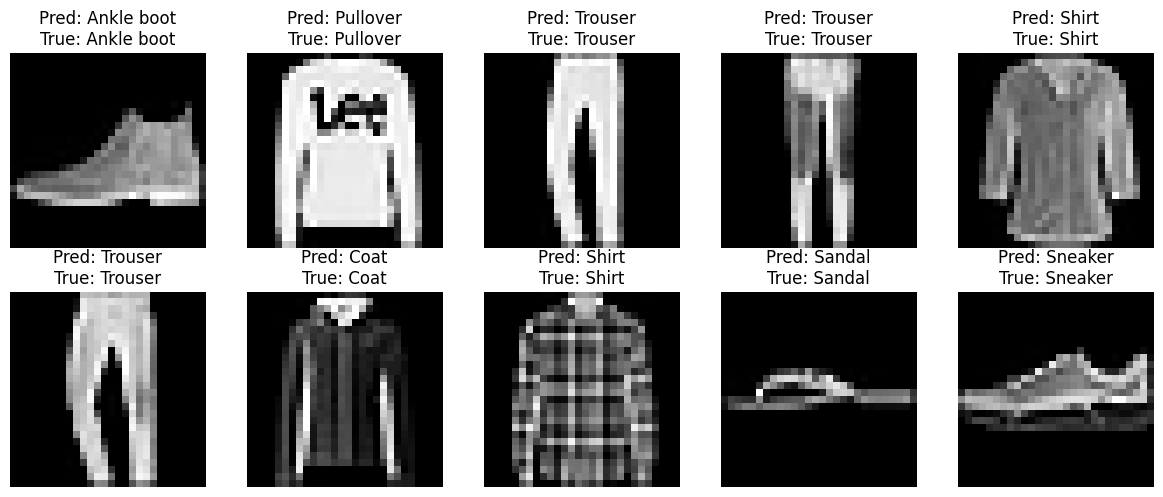

In [ ]:
import matplotlib.pyplot as plt

# Map integer labels to fashion item names
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28,28), cmap='gray')
    ax.set_title(f"Pred: {fashion_labels[pred_labels[i]]}\nTrue: {fashion_labels[true_labels[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()